In [167]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [168]:
df_m = pd.read_csv('../data/student-mat.csv', delimiter=';')

In [169]:
# merges the math and portuguese dataframes together

#frames = [df_m, df_p]
#df = pd.concat(frames)

In [170]:
df_m.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [171]:
df_m.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Univariate Analysis

We want to gather some visualization analysis to help us understand the two dataframes more

<Axes: xlabel='Medu', ylabel='Count'>

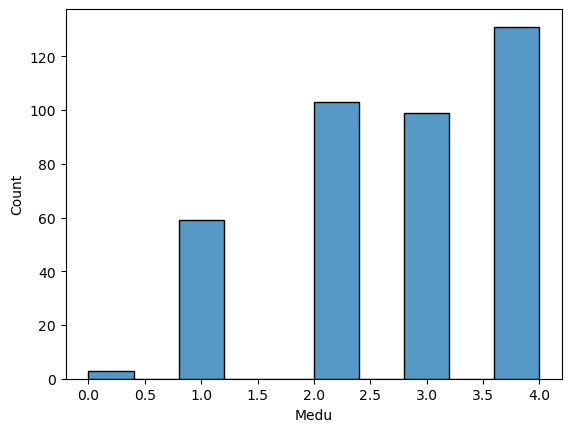

In [172]:
# plot a seaborn histogram for "Mothers education" column in the df_m dataframe
sns.histplot(data=df_m, x ='Medu')

<Axes: xlabel='Fedu', ylabel='Count'>

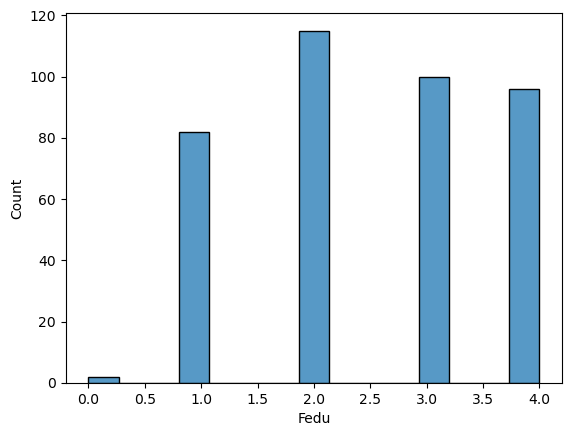

In [173]:
# plot a seaborn histogram for "Fathers education" column in the df_m dataframe
sns.histplot(data=df_m, x ='Fedu')

<Axes: xlabel='G1', ylabel='Count'>

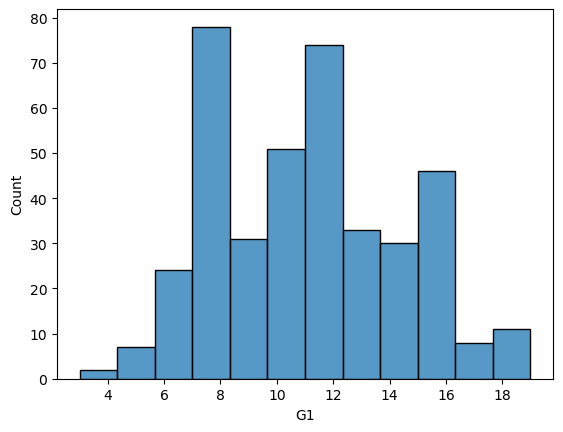

In [174]:
sns.histplot(data=df_m, x = 'G1')

<Axes: xlabel='G2', ylabel='Count'>

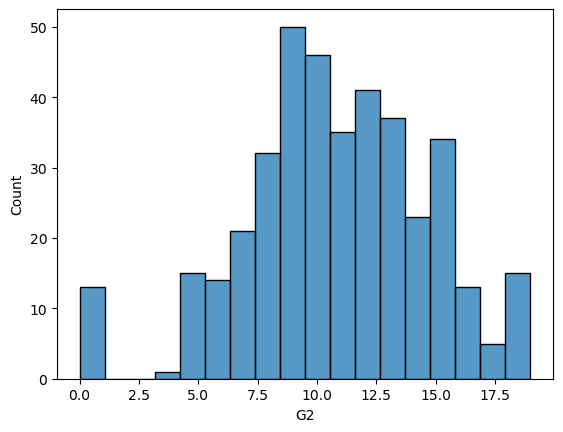

In [175]:
sns.histplot(data=df_m, x = 'G2')

<Axes: xlabel='G3', ylabel='Count'>

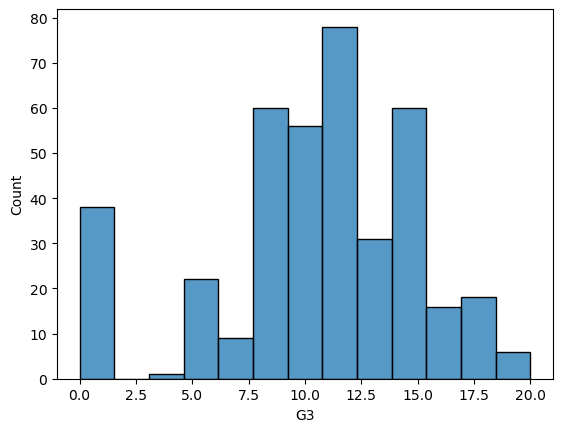

In [176]:
sns.histplot(data=df_m, x = 'G3')

<Axes: xlabel='Mjob', ylabel='Count'>

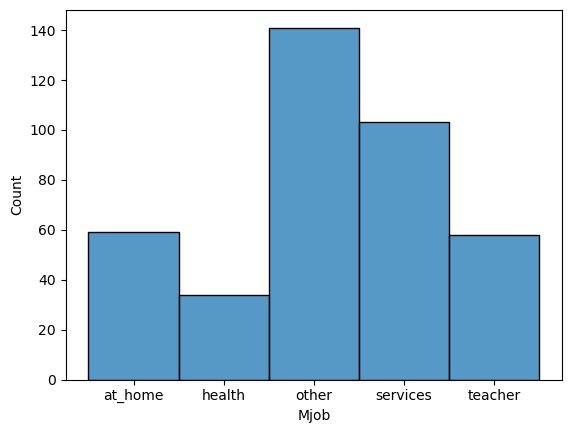

In [177]:
# plot a seaborn histogram for the Mothers Profession status column in the df_m dataframe
sns.histplot(data=df_m, x ='Mjob')

<Axes: xlabel='Fjob', ylabel='Count'>

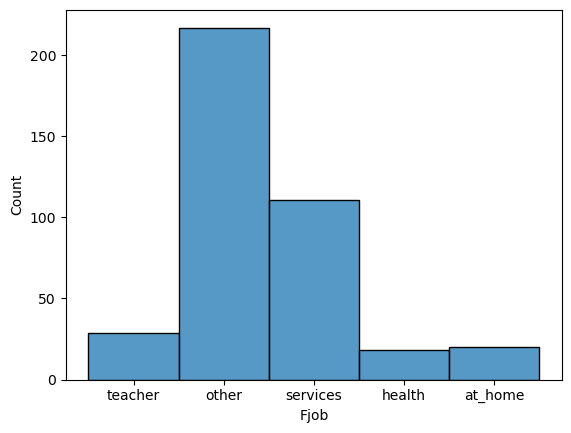

In [178]:
# plot a seaborn histogram for the Fathers Profession status column in the df_m dataframe
sns.histplot(data=df_m, x ='Fjob')

In [179]:
Fjob_counts_m = df_m['Fjob'].value_counts()
Fjob_counts_m

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

<Axes: xlabel='Fjob'>

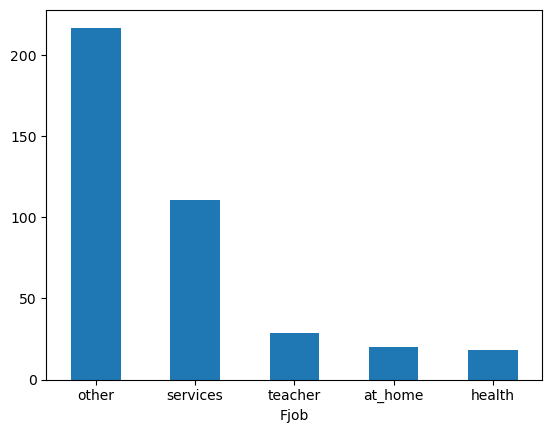

In [180]:
Fjob_counts_m.plot.bar(rot=0)

In [181]:
Mjob_counts_m = df_m['Mjob'].value_counts()
Mjob_counts_m

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

<Axes: xlabel='Mjob'>

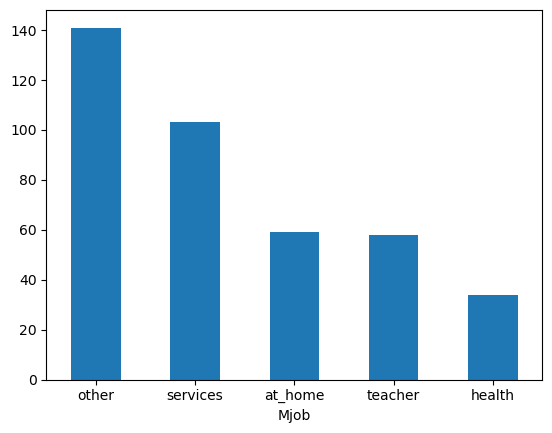

In [182]:
Mjob_counts_m.plot.bar(rot=0)

In [183]:
Fedu_counts_m = df_m['Fedu'].value_counts()
Fedu_counts_m

Fedu
2    115
3    100
4     96
1     82
0      2
Name: count, dtype: int64

<Axes: xlabel='Fedu'>

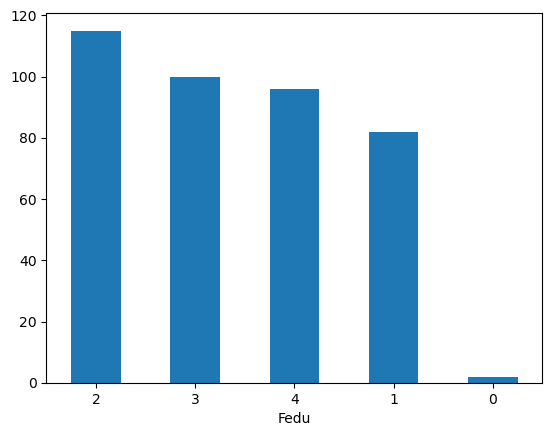

In [184]:
Fedu_counts_m.plot.bar(rot=0)

In [185]:
Medu_counts_m = df_m['Medu'].value_counts()
Medu_counts_m

Medu
4    131
2    103
3     99
1     59
0      3
Name: count, dtype: int64

<Axes: xlabel='Medu'>

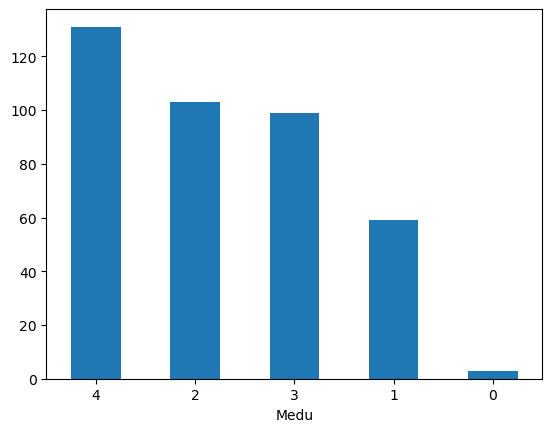

In [186]:
Medu_counts_m.plot.bar(rot=0)

In [187]:
cum_grades = df_m["G2"] + df_m["G1"] + df_m["G3"]
cum_grades

0      17
1      16
2      25
3      44
4      26
       ..
390    27
391    46
392    25
393    33
394    26
Length: 395, dtype: int64

In [188]:
grade_counts_m = cum_grades.value_counts()
grade_counts_m

27    23
28    21
37    16
30    15
35    14
32    14
38    13
46    13
34    13
33    13
24    12
41    12
29    11
39    11
40    10
31    10
19    10
36     9
43     9
45     9
44     9
25     9
23     8
21     8
16     8
11     7
42     7
13     6
26     6
22     6
20     5
17     5
47     5
48     4
50     4
54     4
15     3
7      3
53     3
49     3
52     3
56     3
5      2
18     2
12     2
51     2
55     2
6      2
9      1
10     1
4      1
8      1
58     1
14     1
Name: count, dtype: int64

<Axes: >

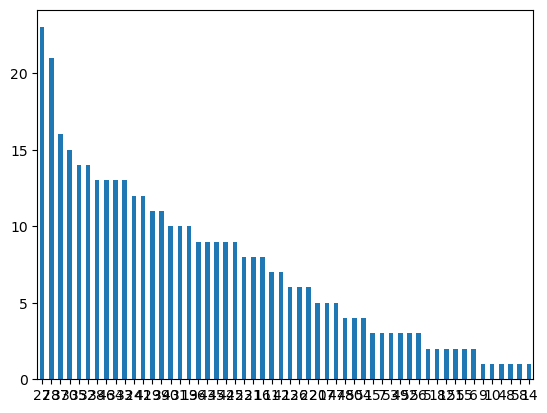

In [189]:
grade_counts_m.plot.bar(rot=0)

# Bivariate Analysis

Generating visualization for relationships between various variables to understand the patterns that are present in the dataset.

<Axes: xlabel='Fedu', ylabel='G1'>

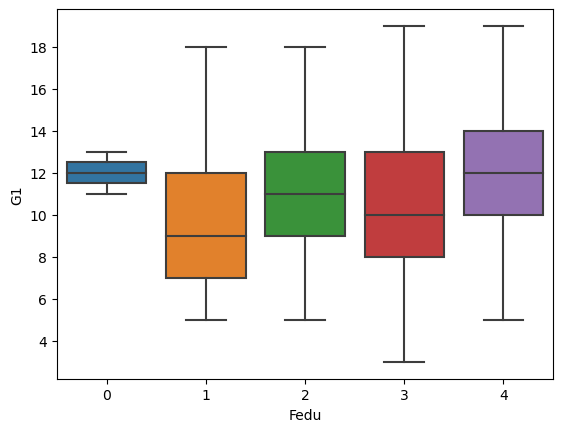

In [190]:
sns.boxplot(data=df_m, y ='G1', x = 'Fedu')

<Axes: xlabel='Fedu', ylabel='G2'>

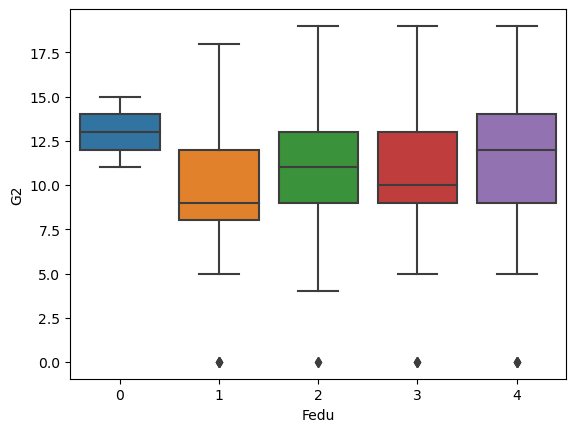

In [191]:
sns.boxplot(data=df_m, y ='G2', x = 'Fedu')

<Axes: xlabel='Fedu', ylabel='G3'>

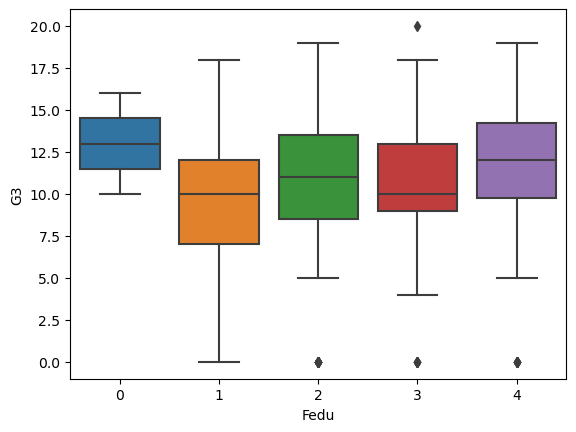

In [192]:
sns.boxplot(data=df_m, y ='G3', x = 'Fedu')

<Axes: xlabel='Medu', ylabel='G1'>

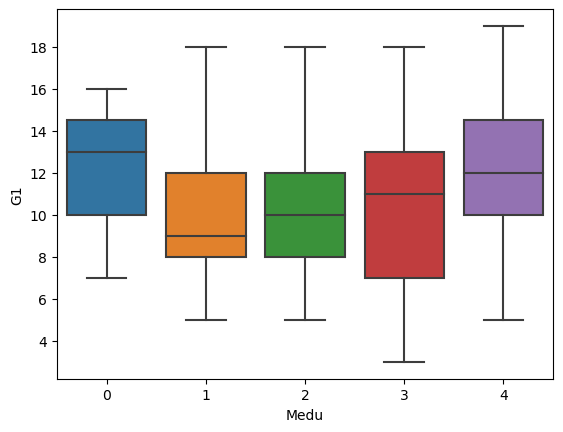

In [193]:
sns.boxplot(data=df_m, y ='G1', x = 'Medu')

<Axes: xlabel='Medu', ylabel='G2'>

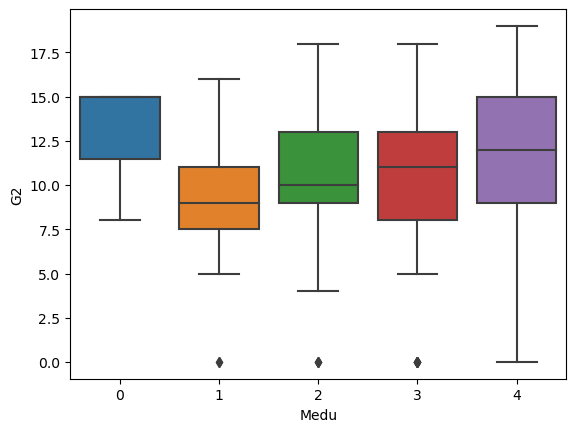

In [194]:
sns.boxplot(data=df_m, y ='G2', x = 'Medu')

<Axes: xlabel='Medu', ylabel='G3'>

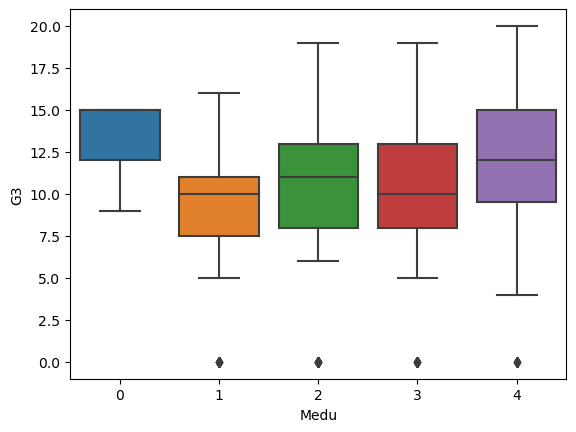

In [195]:
sns.boxplot(data=df_m, y ='G3', x = 'Medu')

<Axes: xlabel='Fjob', ylabel='G1'>

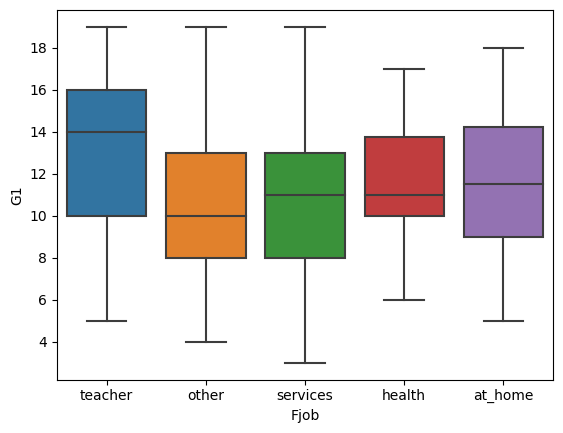

In [196]:
sns.boxplot(data=df_m, y ='G1', x = 'Fjob')

<Axes: xlabel='Fjob', ylabel='G2'>

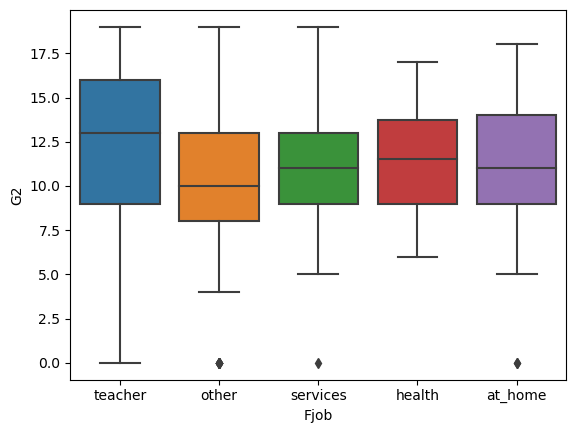

In [197]:
sns.boxplot(data=df_m, y ='G2', x = 'Fjob')

<Axes: xlabel='Fjob', ylabel='G3'>

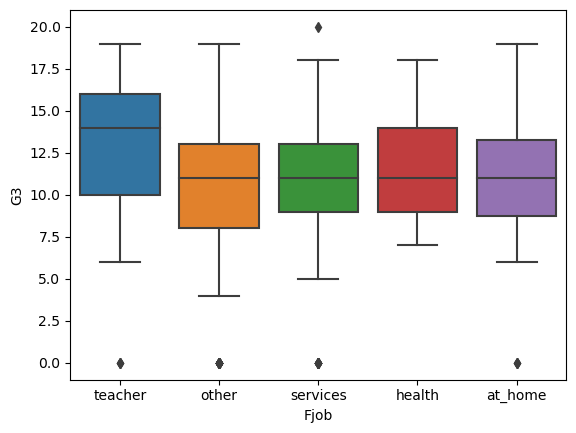

In [198]:
sns.boxplot(data=df_m, y ='G3', x = 'Fjob')

<Axes: xlabel='Mjob', ylabel='G1'>

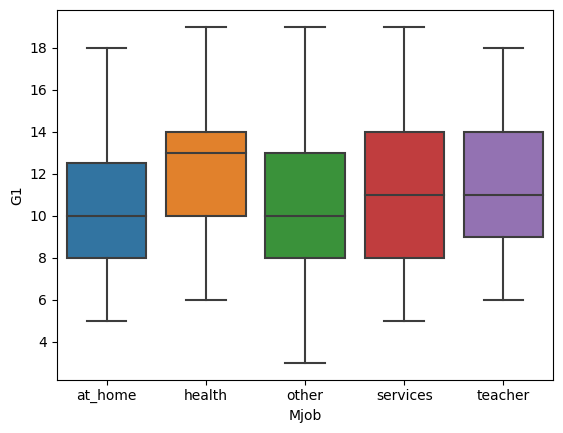

In [199]:
sns.boxplot(data=df_m, y ='G1', x = 'Mjob')

<Axes: xlabel='Mjob', ylabel='G2'>

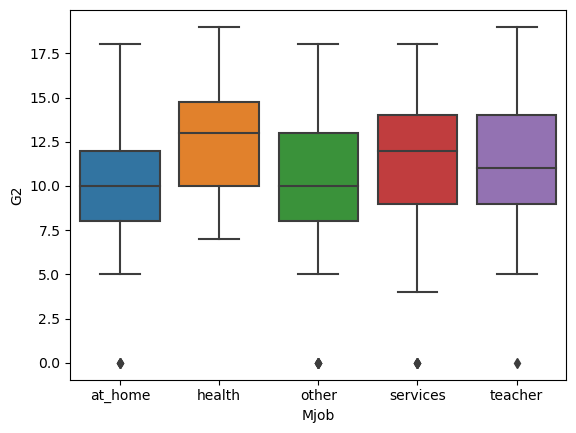

In [200]:
sns.boxplot(data=df_m, y ='G2', x = 'Mjob')

<Axes: xlabel='Mjob', ylabel='G3'>

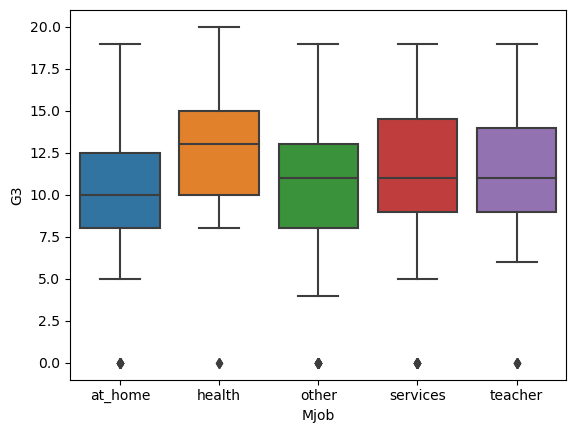

In [201]:
sns.boxplot(data=df_m, y ='G3', x = 'Mjob')

# Exploratory Data Analysis II
